# Question Answering Tutorial

If you have some experience with machine learning and maybe NLP, but no clue about Question Answering, this tutorial is for you! I'll go through the basic starting with the data format, common approaches to solving the task and some ideas where to go further. 

Note we'll be focusing on a subset of QA relevant to the ChAII challenge - we will assume that we're already provided with the context. Formally, this task is called **reading comprehension** and is different from **open domain question answering** where we don't have a context (we might have a corpus of documents like the whole of wikipedia instead). 

## What are we trying to achieve?

We are given 2 datapoints: a question and a context, for example full wikipedia article that may contain an answer to the question. Our goal is to produce an answer to the question based on the context. In the case of **extractive question answering** we assume that the answer is a subset of the context, so we can define it as span prediction, e.g. a range of characters or tokens. We can also formulate this as an **abstractive** task, where we just want to obtain the answer, which may be phrased differently from our context. 

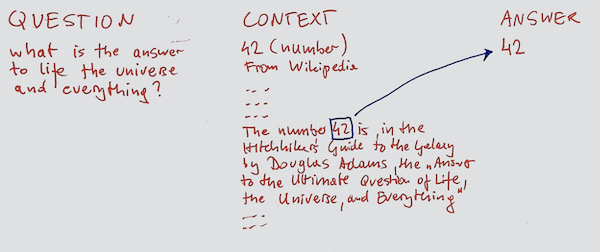

## What approaches can we use to attack the problem?

Let's look at 2 different approaches for question answering.

### Start/End Positions

This approach is associated with **extractive question answering** because we are trying to identify the span - start and end token indices - which represents the answer to our question. To do this, we concatenate question and answer together, and pass it through a model that is typically a transformer with 2 linear heads corresponding to START and END logits. For each token, we obtain probability that it is the START of the answer span (START logits) and that it is the END of the answer span (END logits). Based on those probabilities, we can select the most likely span and use it as our answer prediction. 

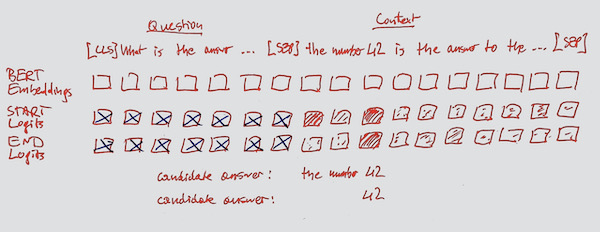

### Seq2Seq

In a sequence to sequence approach, which can be associated with **abstractive question answering**, we use an auto-regressive language model to generate an answer. We can use either question only, or a concatenation of context and question as the prompt. We train a model so that it learns to produce an answer as a continuation of given prompt. During inference, we generate the answer step by step, using the language model to predict the most likely token until it comes up with the token representing end of sequence. 

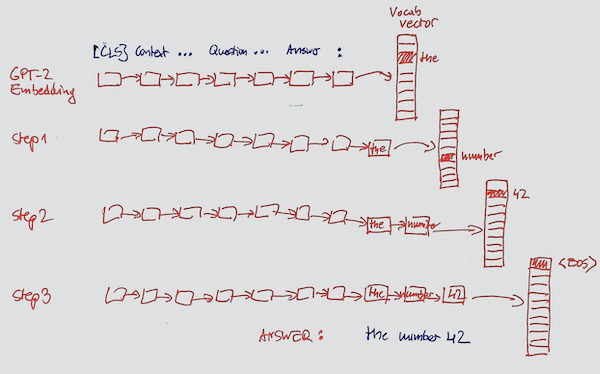

### Handling Longer Context

There is a limit to the length of text we can encode with a transformer model, and frequently our context is longer than that limit. In such case, we typically chunk the context using a fixed sliding window. This means we will have plenty of examples that do not contain an answer - typically we train the model to put the START and END logits on the CLS token in such a case. That means we need to account for the CLS token probability when comparing the scores between probable answers, for example we can calculate a candidate answer score as: START logits + END logits - CLS logits. 

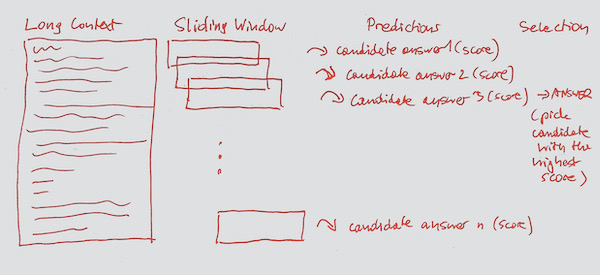

## What else can we do?

The key problem in this challenge is a small size of our dataset. To make up for it, we can consider a bunch of different approaches, for example: 

- Question Generation
- Translation
- Augmentation
- Pretraining

I hope this helps! I will probably continue working on this tutorial and expanding it, please share your questions and feedback in the comments! I'll also appreciate an upvote if you found this material helpful :) 